In [ ]:
!pip install SpeechRecognition
!pip3 install pydub
!pip install youtube_dl
!pip install ffmpeg moviepy

import speech_recognition as sr
from os import path
from pydub import AudioSegment

from __future__ import unicode_literals
import youtube_dl

import pandas as pd
from collections import defaultdict

import wave
import contextlib

import moviepy.editor as mp


In [ ]:
ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192',
    }],
}

In [ ]:
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=4TUrfX0DXjs'])

[youtube] 4TUrfX0DXjs: Downloading webpage
[download] Ya perdoné a Felipe Calderón por robarme la Presidencia - AMLO-4TUrfX0DXjs.webm has already been downloaded
[download] 100% of 2.01MiB
[ffmpeg] Destination: Ya perdoné a Felipe Calderón por robarme la Presidencia - AMLO-4TUrfX0DXjs.wav
Deleting original file Ya perdoné a Felipe Calderón por robarme la Presidencia - AMLO-4TUrfX0DXjs.webm (pass -k to keep)


In [ ]:
my_clip = mp.VideoFileClip(r"/content/6- Comte de Saint-Germain.mp4")
my_clip.audio.write_audiofile(r"my_result.mp3")


[MoviePy] Writing audio in my_result.mp3


100%|██████████| 4413/4413 [00:06<00:00, 706.21it/s]

[MoviePy] Done.


In [ ]:
# files                                                                         
src = "my_result.mp3"
dst = "audio.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='audio.wav'>

In [ ]:
r = sr.Recognizer()
audio_path="/content/audio.wav"
audio= sr.AudioFile(audio_path)
with audio as source:
  audio1 = r.record(source)


In [ ]:
with contextlib.closing(wave.open(audio_path,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = round(frames / float(rate),2)
    print(duration)


200.11


In [ ]:
text1=r.recognize_google(audio1, language="fr-FR")

In [ ]:
text1

"salut les amis j'espère que vous allez bien moi ça va très bien aujourd'hui on va parler d'un personnage mystérieux le comte de Saint-Germain le comte de Saint-Germain et un homme qui est sorti de nulle part on entend pour la première fois parler du compte en 1743 il devient très vite un personnage énigmatique on dit de lui qu'il est extrêmement riche que c'est un grand alchimiste et qui les guérisseurs mais par-dessus tout qu'il est immortel le comte de Saint-Germain aurait connu des personnes du passé comme le roi de France François 1er il parlait d'ailleurs des banquets que organisé François 1er et de la culture française à cette époque il raconte et d'ailleurs cette histoire avec tellement de précision que toutes les personnes qui entendait cette histoire était persuadé qu'il avait vécu à cette époque par la suite le compte à avouer qu'en fait il avait lu énormément de livres et avait une très bonne mémoire donc du coup c'est ça qui pouvait lui permettre de raconter toutes les his

In [ ]:
text_str= str(text1)
text_list= list(text_str.split())


In [ ]:
d=defaultdict(int)
for word in text_list:
  d[word]+=1

In [ ]:
for word in sorted(d, key=d.get, reverse=True):
  if len(word)>3:
    print(word, d[word])

In [ ]:
len(text_list)-len(d)

170

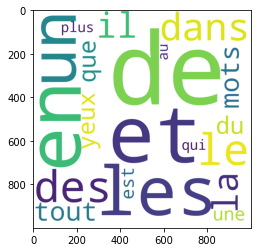

In [ ]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(d)
plt.imshow(wc)